In [2]:
#package
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use(["seaborn"])

#encode
from sklearn.preprocessing import LabelEncoder

#NB
from sklearn.naive_bayes import GaussianNB


In [7]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny', 'Rainy','Sunny','Overcast','Overcast','Rainy']

temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [28]:
df_data = pd.DataFrame({"weather":weather, "temp":temp, "play":play})
df_data

,weather,temp,play
0,Sunny,Hot,No
1,Sunny,Hot,No
2,Overcast,Hot,Yes
3,Rainy,Mild,Yes
4,Rainy,Cool,Yes
5,Rainy,Cool,No
6,Overcast,Cool,Yes
7,Sunny,Mild,No
8,Sunny,Cool,Yes
9,Rainy,Mild,Yes


In [31]:
df_data_encoded = df_data.copy()

le = LabelEncoder()

df_data_encoded["weather"] = le.fit_transform(df_data_encoded["weather"])
print(le.classes_) 

df_data_encoded["temp"] = le.fit_transform(df_data_encoded["temp"])
print(le.classes_)

df_data_encoded["play"] = le.fit_transform(df_data_encoded["play"])
print(le.classes_)

df_data_encoded

['Overcast' 'Rainy' 'Sunny']
['Cool' 'Hot' 'Mild']
['No' 'Yes']


,weather,temp,play
0,2,1,0
1,2,1,0
2,0,1,1
3,1,2,1
4,1,0,1
5,1,0,0
6,0,0,1
7,2,2,0
8,2,0,1
9,1,2,1


In [32]:
x = df_data_encoded[["weather", "temp"]]
y = df_data_encoded["play"]

In [35]:
model = GaussianNB()
model.fit(x, y)

GaussianNB()

In [36]:
from sklearn.metrics import classification_report


y_pred = model.predict(x)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.78      0.78      0.78         9

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14



In [38]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y, y_pred)
cm

array([[3, 2],
       [2, 7]], dtype=int64)

In [44]:
def visualCM(cm):
  n = len(cm)
  fig, ax = plt.subplots(figsize=(n+1, n+1))
  ax.imshow(cm)
  ax.grid(False)
  ticks = tuple(np.arange(n))
  ax.xaxis.set(ticks=ticks)
  ax.yaxis.set(ticks=ticks)
  ax.set_ylim(n-0.5, -0.5)
  for i in range(n):
      for j in range(n):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize=15)
  plt.xlabel("predicted")
  plt.ylabel("actual")
  plt.title("Confusion Matrix")
  plt.show()

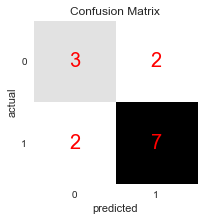

In [45]:
cm = confusion_matrix(y, y_pred)

visualCM(cm)